# Change Directory

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
file_dir = "/content/drive/MyDrive/DATA PREPROCESSING II"
os.chdir(file_dir)

In [3]:
!ls

'Data Preprocessing II.docx'		 '[Sandbox] Imbalance_Dataset.ipynb'
'[Sandbox] Data_Preprocessing_II.ipynb'   spam.csv


# Import Library

In [4]:
import pandas as pd
import seaborn as sns

# Text Processing
import re
import nltk

In [5]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [10]:
from nltk.stem import WordNetLemmatizer

In [11]:
# Dataset Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
# ML Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [13]:
# ML Model Evaluation
from sklearn.model_selection import cross_val_score

# Load Dataset

In [14]:
df_spam = pd.read_csv('spam.csv', encoding='latin-1')
df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df_spam = df_spam.drop(
    columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
)
df_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df_spam = df_spam.rename(
    columns={
        'v1' : 'label',
        'v2' : 'messege'
    }
)
df_spam.head()

,label,messege
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Exploration

## Label Counts

ham     4825
spam     747
Name: label, dtype: int64


<Axes: >

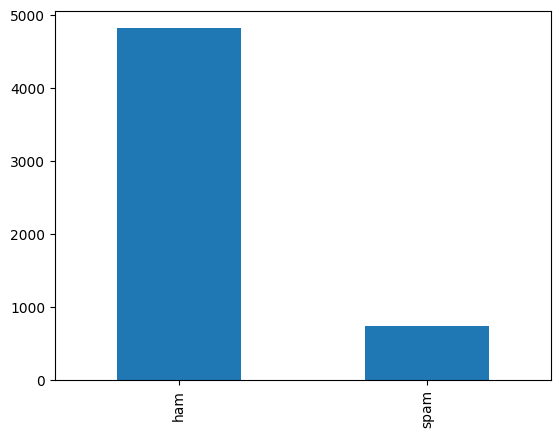

In [17]:
print(df_spam.label.value_counts())
df_spam.label.value_counts().plot(kind='bar')

## Messege Length

In [18]:
df_spam["messege_len"] = df_spam.messege.apply(len)
df_spam.sort_values(by="messege_len", ascending=False).head(10)

,label,messege,messege_len
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2847,ham,Sad story of a Man - Last week was my b'day. M...,588
2157,ham,Sad story of a Man - Last week was my b'day. M...,588
2379,ham,"Good evening Sir, hope you are having a nice d...",482
3015,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1512,ham,"Hey sweet, I was wondering when you had a mome...",458
2369,ham,A Boy loved a gal. He propsd bt she didnt mind...,450


# Text Preprocessing

## Text Cleaning

In [19]:
ex_text = "saya makan nasi"
ex_text.split()

['saya', 'makan', 'nasi']

In [20]:
def clean_text(text):
  # Replacing all non-alphabetic characters with space
  sms = re.sub('[^a-zA-Z]', ' ', text)
  # Converting to lowercase
  sms = sms.lower()
  # Splitting text (Tokenization)
  sms = sms.split()
  # Rejoining text
  sms = ' '.join(sms)

  return sms

In [21]:
df_spam["cleaned_text"] = df_spam.messege.apply(clean_text)
df_spam

,label,messege,messege_len,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,this is the nd time we have tried contact u u ...
5568,ham,Will Ì_ b going to esplanade fr home?,37,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,pity was in mood for that so any other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitching but i acted like i d...


In [22]:
print("The first 10 Texts after cleaning : \n")
print(*df_spam["cleaned_text"][:10], sep='\n')

The first 10 Texts after cleaning : 

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though
freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv
even my brother is not like to speak with me they treat me like aids patent
as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune
winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only
had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call 

## Tokenization

In [23]:
dummy = pd.DataFrame({
    'v1' : [0, 4, 1, 5],
    'v2' : [5, 5, 10, 3]
})
dummy

,v1,v2
0,0,5
1,4,5
2,1,10
3,5,3


In [24]:
def my_function(a, b):
  return (a+b)**2 + (b/(a*2))**(1/2)
my_function(2, 4)

37.0

In [25]:
dummy["result"] = dummy.apply(lambda row: my_function(row['v1'], row['v2']), axis=1)
dummy

<ipython-input-24-09a27ecc06a0>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return (a+b)**2 + (b/(a*2))**(1/2)


,v1,v2,result
0,0,5,inf
1,4,5,81.790569
2,1,10,123.236068
3,5,3,64.547723


In [26]:
df_spam

,label,messege,messege_len,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,this is the nd time we have tried contact u u ...
5568,ham,Will Ì_ b going to esplanade fr home?,37,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,pity was in mood for that so any other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitching but i acted like i d...


In [27]:
df_spam["tokenized_text"] = df_spam.apply(
    lambda x: nltk.word_tokenize(x["cleaned_text"]),
    axis=1
)
df_spam.head()

,label,messege,messege_len,cleaned_text,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."


## Remove Stopwords

In [28]:
# Removing Stopwords function
def remove_stopwords(text):
  stop_words = set(stopwords.words("english"))
  filtered_text = [word for word in text if word not in stop_words]
  return filtered_text

In [29]:
df_spam["no_stopwords_text"] = df_spam["tokenized_text"].apply(remove_stopwords)
print("The first 10 Texts after removing the stopwords :\n")
print(*df_spam["no_stopwords_text"][:10], sep="\n")

The first 10 Texts after removing the stopwords :

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']
['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune']
['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl',

## Lemmatization

In [30]:
lemmatizer = WordNetLemmatizer()
# pos = post-of-speech(adj,verd,noun,etc)
def lemmarized_word(text):
  lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]
  return lemmas

In [31]:
df_spam["lemmatized_text"] = df_spam["no_stopwords_text"].apply(lemmarized_word)
print("The first 10 Texts after lemmatization :\n")
print(*df_spam["lemmatized_text"][:10], sep='\n')

The first 10 Texts after lemmatization :

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']
['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune']
['winner', 'value', 'network', 'customer', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hours']

In [32]:
df_spam.head()

,label,messege,messege_len,cleaned_text,tokenized_text,no_stopwords_text,lemmatized_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


## Vectorization

### Creating a corpus of lemmatized text

In [33]:
corpus = []
for i in df_spam["lemmatized_text"]:
  msg = ' '.join([row for row in i])
  corpus.append(msg)
print("The first 10 Lines in corpus :\n")
print(*corpus[:10], sep='\n')

The first 10 Lines in corpus :

go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though
freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv
even brother like speak treat like aid patent
per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune
winner value network customer select receivea prize reward claim call claim code kl valid hours
mobile months u r entitle update latest colour mobiles camera free call mobile update co free


### Converting the corpus into vector form

In [34]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus)
X.dtype

dtype('float64')

In [35]:
X

<5572x6578 sparse matrix of type '<class 'numpy.float64'>'
	with 44949 stored elements in Compressed Sparse Row format>

### Label encoding the classes in Target

In [36]:
le = LabelEncoder()
df_spam["label"] = le.fit_transform(df_spam["label"])

In [37]:
df_spam.head()

,label,messege,messege_len,cleaned_text,tokenized_text,no_stopwords_text,lemmatized_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


# Model Building

In [38]:
y = df_spam["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [39]:
classifiers = {
    MultinomialNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC()
}

for cls in classifiers:
  cls.fit(X_train, y_train)

pipe_dict = {
    0: "NaiveBayes",
    1: "RandomForest",
    2: "KNeighbours",
    3: "SVC"
}

In [40]:
pipe_dict

{0: 'NaiveBayes', 1: 'RandomForest', 2: 'KNeighbours', 3: 'SVC'}

# Model Evaluation

In [41]:
# Cross-Validation
for i, model in enumerate(classifiers):
  cv_acc = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
  print("%s: %f " % (pipe_dict[i], cv_acc.mean()))
# Cross-Validation
for i, model in enumerate(classifiers):
  cv_rec = cross_val_score(model, X_train, y_train, scoring='recall', cv=10)
  print("%s: %f " % (pipe_dict[i], cv_rec.mean()))
# Cross-Validation
for i, model in enumerate(classifiers):
  cv_pre = cross_val_score(model, X_train, y_train, scoring='precision', cv=10)
  print("%s: %f " % (pipe_dict[i], cv_pre.mean()))
# Cross-Validation
for i, model in enumerate(classifiers):
  cv_f1 = cross_val_score(model, X_train, y_train, scoring='f1', cv=10)
  print("%s: %f " % (pipe_dict[i], cv_f1.mean()))

NaiveBayes: 0.977338 
RandomForest: 0.914740 
KNeighbours: 0.976217 
SVC: 0.966568 


NaiveBayes: 0.825706 
RandomForest: 0.363418 
KNeighbours: 0.825763 
SVC: 0.750339 


NaiveBayes: 0.998148 
RandomForest: 1.000000 
KNeighbours: 0.996429 
SVC: 1.000000 


NaiveBayes: 0.912081 
RandomForest: 0.530579 
KNeighbours: 0.901807 
SVC: 0.856225 


In [45]:
results = {
    'Model': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1-score': []
}

# Loop melalui hasil cross-validation dan tambahkan ke dictionary
for i, model_name in enumerate(pipe_dict.values()):
    results['Model'].append(model_name)
    results['Accuracy'].append(cv_acc[i].mean())
    results['Recall'].append(cv_rec[i].mean())
    results['Precision'].append(cv_pre[i].mean())
    results['F1-score'].append(cv_f1[i].mean())

# Buat dataframe dari dictionary
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
results_df = pd.DataFrame(results)

# Cetak dataframe hasil cross-validation
results_df

,Model,Accuracy,Recall,Precision,F1-score
0,NaiveBayes,0.9641,0.7333,1.0000,0.8462
1,RandomForest,0.9753,0.8167,1.0000,0.8991
2,KNeighbours,0.9776,0.8333,1.0000,0.9091
3,SVC,0.9596,0.7000,1.0000,0.8235
